In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import main

In [2]:
## Start of Notebook

print('Starting Assignment 1')
RawData = main.ReadInData("../data/tcd ml 2019-20 income prediction training (with labels).csv")
print(RawData.shape)
print(RawData.describe())

## Might not need this line here. Just a precaution for NaN.
# if trainingData.isnull().any:
#     trainingData = trainingData.fillna(method='ffill')


Starting Assignment 1
(111993, 12)
            Instance  Year of Record            Age  Size of City  \
count  111993.000000   111552.000000  111499.000000  1.119930e+05   
mean    55997.000000     1999.421274      37.345304  8.388538e+05   
std     32329.738686       11.576382      16.036694  2.196879e+06   
min         1.000000     1980.000000      14.000000  7.700000e+01   
25%     27999.000000     1989.000000      24.000000  7.273400e+04   
50%     55997.000000     1999.000000      35.000000  5.060920e+05   
75%     83995.000000     2009.000000      48.000000  1.184501e+06   
max    111993.000000     2019.000000     115.000000  4.999251e+07   

       Wears Glasses  Body Height [cm]  Income in EUR  
count  111993.000000     111993.000000   1.119930e+05  
mean        0.500531        175.220192   1.092138e+05  
std         0.500002         19.913889   1.498024e+05  
min         0.000000         94.000000  -5.696906e+03  
25%         0.000000        160.000000   3.077169e+04  
50%    

In [3]:
## Dropping Features that are missing a large amount of data
## Dropping instances with missing data

RawData = RawData.drop("Gender",axis=1)
RawData = RawData.drop("University Degree",axis=1)
RawData = RawData.drop("Hair Color",axis=1)
RawData = RawData.dropna()

null_counts = RawData.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Instance            0
Year of Record      0
Age                 0
Country             0
Size of City        0
Profession          0
Wears Glasses       0
Body Height [cm]    0
Income in EUR       0
dtype: int64


In [4]:
## Checking data for missing values

null_counts = RawData.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
Instance            0
Year of Record      0
Age                 0
Country             0
Size of City        0
Profession          0
Wears Glasses       0
Body Height [cm]    0
Income in EUR       0
dtype: int64


In [5]:
## Seeing the data and the unique values

for s in RawData.columns.values:
    print("Features in " + s)
    print(RawData[s].unique())
    print(len(RawData[s].unique()))


Features in Instance
[     1      2      3 ... 111991 111992 111993]
110739
Features in Year of Record
[1997. 1996. 2018. 2006. 2010. 1991. 1982. 2008. 2015. 2019. 1981. 1989.
 2003. 1987. 1995. 1992. 1980. 1983. 2011. 2014. 1985. 2005. 1998. 2001.
 2017. 2007. 1988. 1994. 2012. 2009. 2013. 2004. 1999. 2002. 1993. 2000.
 1990. 2016. 1986. 1984.]
40
Features in Age
[ 41.  28.  33.  46.  60.  71.  36.  43.  16.  51.  15.  22.  32.  40.
  31.  27.  25.  35.  63.  38.  34.  20.  23.  14.  37.  62.  52.  47.
  24.  26.  50.  49.  18.  19.  39.  66.  21.  44.  29.  64.  65.  53.
  78.  42.  58.  17.  30.  79.  48.  56.  83.  54.  74.  87.  90.  67.
  45.  77.  73.  55.  92.  80.  72.  57.  70.  59.  61.  82.  69.  98.
  94.  68.  81.  97.  76.  75.  88.  91.  96.  84.  89. 107.  85.  86.
 100. 110.  95.  99.  93. 104. 102. 101. 105. 111. 108. 103. 109. 106.
 115.]
99
Features in Country
['Belarus' 'Singapore' 'Norway' 'Cuba' 'United Arab Emirates' 'Liberia'
 'State of Palestine' 'Israel' 'So

In [6]:
## Section to conver to binary matrix
## Changing Country, Profession

RawData_Country = pd.get_dummies(RawData.Country)
print(type(RawData_Country))
RawData_Profession = pd.get_dummies(RawData.Profession)
print(type(RawData_Profession))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
RawData.describe()

,Instance,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR
count,110739.000000,110739.000000,110739.000000,1.107390e+05,110739.000000,110739.000000,1.107390e+05
mean,55977.659343,1999.412790,37.341154,8.378984e+05,0.500673,175.222352,1.090052e+05
std,32331.256601,11.577877,16.033197,2.187687e+06,0.500002,19.918049,1.493287e+05
min,1.000000,1980.000000,14.000000,7.700000e+01,0.000000,94.000000,-5.696906e+03
25%,27978.500000,1989.000000,24.000000,7.274450e+04,0.000000,160.000000,3.074007e+04
50%,55973.000000,1999.000000,35.000000,5.060690e+05,1.000000,174.000000,5.728304e+04
75%,83984.500000,2009.000000,48.000000,1.184484e+06,1.000000,190.000000,1.258811e+05
max,111993.000000,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,5.285252e+06


In [8]:
## Creating clean training data
print(RawData.columns)

RawData = pd.concat([RawData, RawData_Country], axis=1)
RawData= RawData.drop('Country', axis=1)
RawData = pd.concat([RawData, RawData_Profession], axis=1)
RawData= RawData.drop('Profession', axis=1)

Index(['Instance', 'Year of Record', 'Age', 'Country', 'Size of City',
       'Profession', 'Wears Glasses', 'Body Height [cm]', 'Income in EUR'],
      dtype='object')


In [9]:
RawData.describe()

,Instance,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR,Afghanistan,Albania,Algeria,...,windows administrator,wireless coordinator,woodworker,word processor,workforce management analyst,workforce planning intern,writer,x-ray technician,yardmaster,youth initiatives lead advisor
count,110739.000000,110739.000000,110739.000000,1.107390e+05,110739.000000,110739.000000,1.107390e+05,110739.00000,110739.000000,110739.000000,...,110739.000000,110739.000000,110739.000000,110739.000000,110739.000000,110739.000000,110739.000000,110739.000000,110739.000000,110739.000000
mean,55977.659343,1999.412790,37.341154,8.378984e+05,0.500673,175.222352,1.090052e+05,0.00019,0.003558,0.000063,...,0.000244,0.000244,0.000307,0.000253,0.000280,0.000217,0.000289,0.000253,0.000181,0.000289
std,32331.256601,11.577877,16.033197,2.187687e+06,0.500002,19.918049,1.493287e+05,0.01377,0.059542,0.007950,...,0.015613,0.015613,0.017520,0.015899,0.016729,0.014720,0.016997,0.015899,0.013438,0.016997
min,1.000000,1980.000000,14.000000,7.700000e+01,0.000000,94.000000,-5.696906e+03,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27978.500000,1989.000000,24.000000,7.274450e+04,0.000000,160.000000,3.074007e+04,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55973.000000,1999.000000,35.000000,5.060690e+05,1.000000,174.000000,5.728304e+04,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83984.500000,2009.000000,48.000000,1.184484e+06,1.000000,190.000000,1.258811e+05,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,111993.000000,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,5.285252e+06,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Output Training Data to new file
RawData.to_csv("../data/processedData.csv", index=False)

In [10]:
## Read in new data and model

CleanData = main.ReadInData("../data/processedData.csv")

In [11]:
CleanData.head(5)

,Instance,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR,Afghanistan,Albania,Algeria,...,windows administrator,wireless coordinator,woodworker,word processor,workforce management analyst,workforce planning intern,writer,x-ray technician,yardmaster,youth initiatives lead advisor
0,1,1997.0,41.0,1239930,0,193,61031.94416,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1996.0,41.0,1603504,0,186,91001.32764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2018.0,28.0,1298017,1,170,157982.17670,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2006.0,33.0,751903,1,171,45993.75793,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2010.0,46.0,95389,0,188,38022.16217,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
income = CleanData['Income in EUR']
features = CleanData.drop(labels=['Income in EUR', 'Instance'], axis=1)

features.head(5)

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Afghanistan,Albania,Algeria,Angola,Argentina,...,windows administrator,wireless coordinator,woodworker,word processor,workforce management analyst,workforce planning intern,writer,x-ray technician,yardmaster,youth initiatives lead advisor
0,1997.0,41.0,1239930,0,193,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1996.0,41.0,1603504,0,186,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018.0,28.0,1298017,1,170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006.0,33.0,751903,1,171,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010.0,46.0,95389,0,188,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
## Splitting Data

features_train, features_val, income_train, income_val = train_test_split(features, income, test_size=0.2, random_state=0)


In [14]:
## Using Linear Regression

model = LinearRegression()
model.fit(features_train, income_train)

print(model.coef_)
print(model.intercept_)


[2.11240731e+03 1.73247264e+03 1.27789271e-03 ... 1.06187428e+05
 3.15588311e+04 8.29173433e+04]
-3926242.7314022416


In [15]:
## Predict with the validation data

income_predict = model.predict(features_val)
comparison = pd.DataFrame({'Actual': income_val, 'Predicted': income_predict})

comparison

,Actual,Predicted
47683,112532.99620,219252.120804
84171,42347.04929,32268.225221
51201,28125.43972,-20196.816387
59745,66034.93745,113643.334297
8807,435410.88810,269061.216426
...,...,...
92028,177938.74390,302127.244865
49264,46932.44769,66701.099303
88953,75652.79685,56519.612344
45270,60204.51270,84858.433027


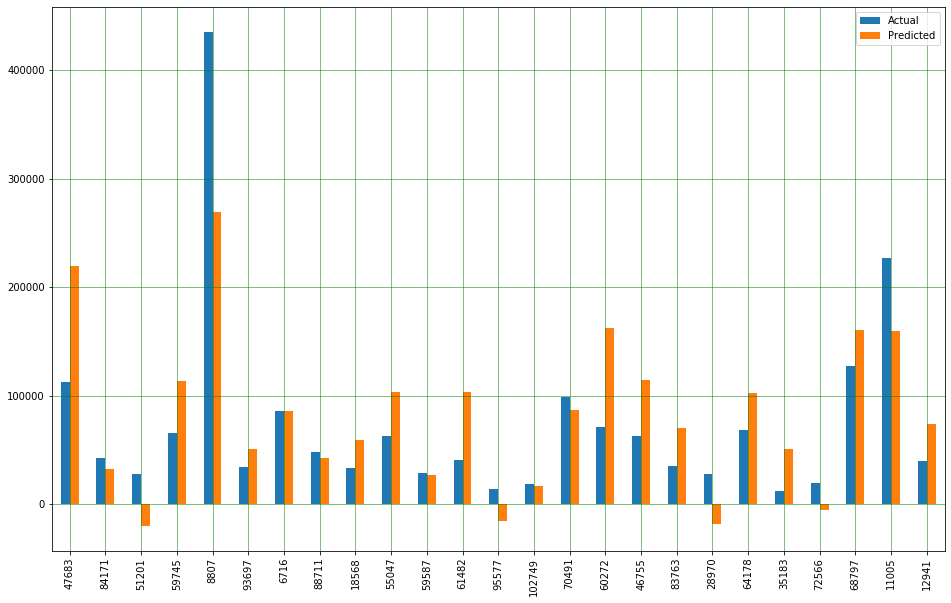

In [16]:
## Graphing Difference 

df1 = comparison.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(income_val, income_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(income_val, income_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(income_val, income_predict)))

## Mean Absolute Error: 43557.00458896904
# Mean Squared Error: 7422065078.367375
# Root Mean Squared Error: 86151.40787223025

Mean Absolute Error: 43557.00458896904
Mean Squared Error: 7422065078.367375
Root Mean Squared Error: 86151.40787223025


In [42]:
## Read in Test and try to map

TestData = main.ReadInData("../data/tcd ml 2019-20 income prediction test (without labels).csv")
TestData.head(5)


,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
0,111994,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153,NaN
1,111995,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163,NaN
2,111996,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153,NaN
3,111997,1984.0,0,29.0,Uruguay,1494132,occupational therapist,No,0,Black,154,NaN
4,111998,2007.0,other,17.0,Serbia,120661,portfolio manager,No,0,Red,191,NaN


In [43]:
## Comparing Training and Test (Country)
print(TestData['Country'].unique())
print("Test Shape " + str(len(TestData['Country'].unique())))
Raw = main.ReadInData("../data/tcd ml 2019-20 income prediction training (with labels).csv")
print(Raw['Country'].unique())
print("Raw Shape " + str(len(Raw['Country'].unique())))

print(TestData['Country'].equals(Raw['Country']))

## Test has less than 3 to Training

['Honduras' 'Kyrgyzstan' 'Portugal' 'Uruguay' 'Serbia'
 'United Arab Emirates' 'Slovakia' 'Togo' 'Liberia' 'El Salvador'
 'Bolivia' 'Switzerland' 'Congo' 'Malawi' 'Czechia' 'Israel' 'Panama'
 'Nicaragua' 'Belarus' 'Syria' 'Finland' 'Sweden' 'Tajikistan' 'Lebanon'
 'Sierra Leone' 'South Sudan' 'Libya' 'Denmark' 'Tunisia' 'Mauritania'
 'Eritrea' 'Guinea' 'Oman' "Côte d'Ivoire" 'Kuwait' 'Georgia' 'Azerbaijan'
 'Laos' 'Norway' 'Paraguay' 'Jamaica' 'Papua New Guinea' 'Belgium' 'Cuba'
 'Ireland' 'Hungary' 'Jordan' 'Rwanda' 'Singapore' 'Haiti' 'Guatemala'
 'Costa Rica' 'Turkmenistan' 'Burundi' 'Angola' 'Bosnia and Herzegovina'
 'Netherlands' 'Bulgaria' 'Gabon' 'Greece' 'Ecuador' 'Burkina Faso'
 'Lesotho' 'New Zealand' 'State of Palestine' 'Mongolia'
 'Central African Republic' 'Zambia' 'Somalia' 'Austria'
 'Dominican Republic' 'Qatar' 'Romania' 'Zimbabwe' 'Botswana' 'Sri Lanka'
 'Chad' 'Kazakhstan' 'Cambodia' 'North Macedonia' 'Slovenia' 'Lithuania'
 'Benin' 'Australia' 'Chile' 'Gambia' 'Como

In [45]:
## Comparing Training and Test (Profession)
print(TestData['Profession'].unique())
print("Test Shape " + str(len(TestData['Profession'].unique())))
print(Raw['Profession'].unique())
print("Raw Shape " + str(len(Raw['Profession'].unique())))

print(TestData['Profession'].equals(Raw['Profession']))

## Test Data has less 15 to Training

['senior project analyst' 'greeter' 'liaison' ... 'Branch Manager'
 'building cleaner' 'chemical engineer']
Test Shape 1326
['steel workers' 'safe event coordinator' 'receivables/payables analyst'
 ... 'blake fellow' 'accountant' 'audit supervisor']
Raw Shape 1341
False


In [46]:
## Comparing Training and Test (University Degree)
print(TestData['University Degree'].unique())
print("Test Shape " + str(len(TestData['University Degree'].unique())))
print(Raw['University Degree'].unique())
print("Raw Shape " + str(len(Raw['University Degree'].unique())))

print(TestData['University Degree'].equals(Raw['University Degree']))

## Test Data has less 15 to Training

['Master' 'Bachelor' 'No' nan 'PhD' '0']
Test Shape 6
['Bachelor' 'Master' 'PhD' 'No' '0' nan]
Raw Shape 6
False


In [67]:
Diff = pd.DataFrame()
Diff["Unique_Country"] = TestData["Country"][~TestData["Country"].isin(Raw["Country"])].drop_duplicates()
print(Diff['Unique_Country'])
print(str(len(Diff['Unique_Country'])))

5385                 Iceland
19468                  Italy
45299                 Turkey
46273                  Samoa
55247    Sao Tome & Principe
70987                 France
Name: Unique_Country, dtype: object
6


In [72]:
Diff = pd.DataFrame()
Diff["Unique_Profession"] = TestData["Profession"][~TestData["Profession"].isin(Raw["Profession"])].drop_duplicates()
print(Diff['Unique_Profession'])
print(str(len(Diff['Unique_Profession'])))

2254     asset management specialist
3134          administrative manager
6676                      astronomer
15269                brokerage clerk
15579                  asset manager
27019     certified it administrator
33617                        cashier
46314             aerospace engineer
58076           apparel patternmaker
59475       clinical case supervisor
67461                 baggage porter
Name: Unique_Profession, dtype: object
11


In [74]:
Diff = pd.DataFrame()
Diff["Unique_Country_2"] = Raw["Country"][~Raw["Country"].isin(TestData["Country"])].drop_duplicates()
print(Diff['Unique_Country_2'])
print(str(len(Diff['Unique_Country_2'])))

426        Argentina
5346        Barbados
36877          Tonga
43852       Thailand
46381        Grenada
48796       DR Congo
49012     Seychelles
78093       Kiribati
108762       Vietnam
Name: Unique_Country_2, dtype: object
9


In [73]:
Diff = pd.DataFrame()
Diff["Unique_Profession_2"] = Raw["Profession"][~Raw["Profession"].isin(TestData["Profession"])].drop_duplicates()
print(Diff['Unique_Profession_2'])
print(str(len(Diff['Unique_Profession_2'])))

879                                     appliance repairer
908                                              assessor 
2859                                      animal caretaker
4522       clinical laboratory technologist and technician
4575                                             chauffeur
6187                                   accountable manager
6869                                 criminal investigator
11192                            administrative specialist
14200                                animal control worker
14258                           cloud reliability engineer
14481                                     bartender helper
19778                                 biological scientist
21103    assistant commissioner of communications and p...
30038                                       cost estimator
30518                   administrative contract specialist
34746                                   compliance auditor
38447                      administrative services manag

In [71]:
print(Diff)

            Unique_Country Unique_Profession Unique_Country_2  \
5385               Iceland               NaN              NaN   
19468                Italy               NaN              NaN   
45299               Turkey               NaN              NaN   
46273                Samoa               NaN              NaN   
55247  Sao Tome & Principe               NaN              NaN   
70987               France               NaN              NaN   

      Unique_Profession_2  
5385                  NaN  
19468                 NaN  
45299                 NaN  
46273                 NaN  
55247                 NaN  
70987                 NaN  
